In [2]:
import numpy as np
import pandas as pd
import os


In [3]:
df = pd.read_csv('/content/data.csv')
df

,Unnamed: 0,Temperature,Humidity
0,0,1,1.0
1,1,NaN,NaN
2,2,3,31.0
3,3,2,22.0
4,4,3,33.0
5,5,1,11.0
6,6,2,21.0
7,7,N/a,24.0
8,8,1,12.0
9,9,na,32.0


#***Detecting NA N/A and NULL values***

***isnull - used to check the null values***

*if the value as null or NaN or N/a then using isnull it shows as TRUE*

In [4]:
df.isnull()

,Unnamed: 0,Temperature,Humidity
0,False,False,False
1,False,True,True
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


*Here pandas cannot recognize na and N/a so in result it shows as False(i.e it shows as there is no null value)*

***only it recognize NaN***

In [5]:
df.isnull().sum()

,0
Unnamed: 0,0
Temperature,1
Humidity,1


#**Here is an problem that pandas cannot recognize the N/a , na in dataset**

In [6]:
#na_values=None defaultly it is None
#np.nan - not a number NaN
missing_values = ['N/a','na',np.nan]
df = pd.read_csv('/content/data.csv',na_values=missing_values)
df

,Unnamed: 0,Temperature,Humidity
0,0,1.0,1.0
1,1,NaN,NaN
2,2,3.0,31.0
3,3,2.0,22.0
4,4,3.0,33.0
5,5,1.0,11.0
6,6,2.0,21.0
7,7,NaN,24.0
8,8,1.0,12.0
9,9,NaN,32.0


In [9]:
df.isnull()


,Unnamed: 0,Temperature,Humidity
0,False,False,False
1,False,True,True
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,True,False
8,False,False,False
9,False,True,False


In [10]:
df.isnull().sum()

,0
Unnamed: 0,0
Temperature,3
Humidity,1


In [11]:
df.isnull().any()

,0
Unnamed: 0,False
Temperature,True
Humidity,True


*If the visualization seaborn is totally black then there is no null values*

<Axes: >

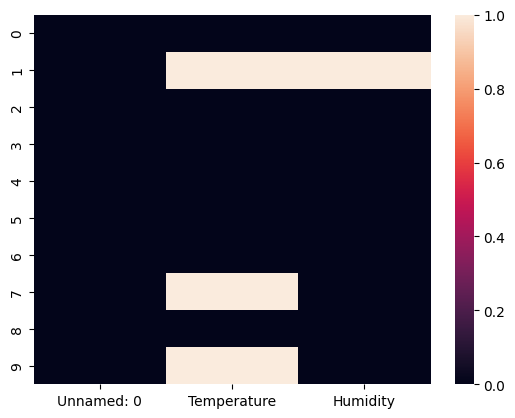

In [12]:
import seaborn as sns
sns.heatmap(df.isnull())

<Axes: >

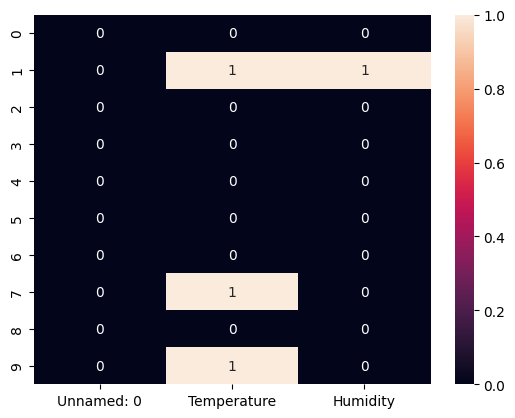

In [13]:
sns.heatmap(df.isnull(),annot=True)

#***Removing NULL values***

In [14]:
df

,Unnamed: 0,Temperature,Humidity
0,0,1.0,1.0
1,1,NaN,NaN
2,2,3.0,31.0
3,3,2.0,22.0
4,4,3.0,33.0
5,5,1.0,11.0
6,6,2.0,21.0
7,7,NaN,24.0
8,8,1.0,12.0
9,9,NaN,32.0


In [25]:
df.dropna()

,Unnamed: 0,Temperature,Humidity
0,0,1.0,1.0
2,2,3.0,31.0
3,3,2.0,22.0
4,4,3.0,33.0
5,5,1.0,11.0
6,6,2.0,21.0
8,8,1.0,12.0


In [24]:
df.fillna(0)

,Unnamed: 0,Temperature,Humidity
0,0,1.0,1.0
1,1,0.0,0.0
2,2,3.0,31.0
3,3,2.0,22.0
4,4,3.0,33.0
5,5,1.0,11.0
6,6,2.0,21.0
7,7,0.0,24.0
8,8,1.0,12.0
9,9,0.0,32.0


In [26]:
df1 = pd.DataFrame({
    'Temperture':[1.0,np.nan,3.0,2.0,3.0],
    'Humidity':[22.0,np.nan,2.0,np.nan,22.0]
})

In [27]:
df1

,Temperture,Humidity
0,1.0,22.0
1,NaN,NaN
2,3.0,2.0
3,2.0,NaN
4,3.0,22.0


*It is not right way to replace the null values as 0*

In [28]:
df1.fillna(0)

,Temperture,Humidity
0,1.0,22.0
1,0.0,0.0
2,3.0,2.0
3,2.0,0.0
4,3.0,22.0


In [30]:
df1.dropna(how='all' )
#it drops only when both the row as null values, else it shows the nullvalues also

,Temperture,Humidity
0,1.0,22.0
2,3.0,2.0
3,2.0,NaN
4,3.0,22.0


In [31]:
df1

,Temperture,Humidity
0,1.0,22.0
1,NaN,NaN
2,3.0,2.0
3,2.0,NaN
4,3.0,22.0


*method backward fill and forward fill is used to fill the above or below values in* ***null value placed***

In [33]:
df1.fillna(method='ffill')


<ipython-input-33-84a2d09498e2>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1.fillna(method='ffill')


,Temperture,Humidity
0,1.0,22.0
1,1.0,22.0
2,3.0,2.0
3,2.0,2.0
4,3.0,22.0


In [34]:
df1.fillna(method='bfill')

<ipython-input-34-08fa0635e4b7>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1.fillna(method='bfill')


,Temperture,Humidity
0,1.0,22.0
1,3.0,2.0
2,3.0,2.0
3,2.0,22.0
4,3.0,22.0


In [35]:
df1

,Temperture,Humidity
0,1.0,22.0
1,NaN,NaN
2,3.0,2.0
3,2.0,NaN
4,3.0,22.0


Interpolate 1.0 + 3.0 = 4.0 / 2

2.0  this values will placed in null value placed

In [37]:
df1.interpolate()


,Temperture,Humidity
0,1.0,22.0
1,2.0,12.0
2,3.0,2.0
3,2.0,12.0
4,3.0,22.0


In [38]:
df

,Unnamed: 0,Temperature,Humidity
0,0,1.0,1.0
1,1,NaN,NaN
2,2,3.0,31.0
3,3,2.0,22.0
4,4,3.0,33.0
5,5,1.0,11.0
6,6,2.0,21.0
7,7,NaN,24.0
8,8,1.0,12.0
9,9,NaN,32.0


In [39]:
df.interpolate()


,Unnamed: 0,Temperature,Humidity
0,0,1.0,1.0
1,1,2.0,16.0
2,2,3.0,31.0
3,3,2.0,22.0
4,4,3.0,33.0
5,5,1.0,11.0
6,6,2.0,21.0
7,7,1.5,24.0
8,8,1.0,12.0
9,9,1.0,32.0


In [45]:
df.fillna(34.0,inplace=True)
df

,Unnamed: 0,Temperature,Humidity
0,0,1.0,1.0
1,1,34.0,34.0
2,2,3.0,31.0
3,3,2.0,22.0
4,4,3.0,33.0
5,5,1.0,11.0
6,6,2.0,21.0
7,7,34.0,24.0
8,8,1.0,12.0
9,9,34.0,32.0
